In [38]:
import csv
import numpy as np
from itertools import combinations
total_bin = 50
interp = 7
import json

In [39]:
with open('data/simulations.csv') as f:
        reader = csv.reader(f)
        header = next(reader)
        data = [[float(x) for x in row] for row in reader]
        total = np.asarray(data)

In [40]:
#cols = total.shape[1]
all_tiles = list(combinations(header,2))
all_ind = list(combinations(range(len(header)),2))
num = len(all_tiles)
total = np.asarray(data)

In [41]:
out = {}
out["tiles"]= {}
tiles = out["tiles"]
for i in range(num):
    cur_key = '/'.join(list(all_tiles[i]))
    
    tiles[cur_key]={}
    tiles[cur_key]["dim"] = list(all_tiles[i])
    
    cur_ind = list(all_ind[i])
    cur_data = total[:,cur_ind]
    H, edges = np.histogramdd(cur_data, bins = (total_bin, total_bin))
    tiles[cur_key]["tile"] = (H/len(data)).tolist()
    tiles[cur_key]["mark"] = [edge.tolist() for edge in edges]

all_range = {}
for keys in header:
    for i in tiles.values():
        for idx, val in enumerate(i["dim"]):
            if val == keys:
                all_range[val] = [i["mark"][idx][0],i["mark"][idx][-1]]
out["range"]=all_range
out["dims"]=header
with open('multi_tiles_50.json', 'w') as outfile:  
    json.dump(out, outfile)

In [37]:
r = np.random.randn(1000000000,3)
H,e = np.histogramdd(r[:,0:2], bins = (total_bin, total_bin))


Create 3D data tiles that cover interaction between all dimensions

In [3]:
#cols = total.shape[1]
all_tiles = list(combinations(header,3))
all_ind = list(combinations(range(len(header)),3))
num = len(all_tiles)
total = np.asarray(data)

In [4]:
r = np.random.randn(100,3)
tiles = {}
for i in range(num):
    cur_key = '/'.join(list(all_tiles[i]))
    
    tiles[cur_key]={}
    tiles[cur_key]["dim"] = list(all_tiles[i])
    
    cur_ind = list(all_ind[i])
    cur_data = total[:,cur_ind]
    H, edges = np.histogramdd(cur_data, bins = (total_bin, total_bin, total_bin))
    tiles[cur_key]["tile"] = H.tolist()
    tiles[cur_key]["mark"] = [edge.tolist() for edge in edges]
with open('multi_tiles_100.json', 'w') as outfile:  
    json.dump(tiles, outfile)

Normalization

In [37]:
# cols = total.shape[1]
# #Normalize First! 
# total_normed = (total- total.min(axis=0))/ (total.max(axis=0)-total.min(axis=0))

Progressive Interpolation

In [69]:
# cur_arr = np.array([])
# cur_mark = np.array([])
# for i in range(cols-1):
#     step = np.linspace(0, 1, num=interp+1, endpoint = False)
#     print step
#     #print step
#     for val in step:
#         #print val
#         #print val*total_normed[:,i]+(1-val)*total_normed[:,i+1]
#         cur_bin, cur_range = np.histogram(val*total_normed[:,i]+(1-val)*total_normed[:,i+1], bins = total_bin)
#         #print cur_arr
#         #print cur_bin
#         ##cur_arr = np.concatenate((cur_arr, cur_bin.T), axis=1) if cur_arr.size is not 0 else cur_bin.T
#         cur_arr = np.vstack((cur_arr, cur_bin)) if cur_arr.size is not 0 else cur_bin
#         cur_mark = np.vstack((cur_mark, cur_range)) if cur_mark.size is not 0 else cur_range

# cur_bin, cur_range = np.histogram(total_normed[:,-1], bins = total_bin)
# #print cur_bin
# cur_arr = np.vstack((cur_arr, cur_bin))
# cur_mark = np.vstack((cur_mark, cur_range)) 

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875]


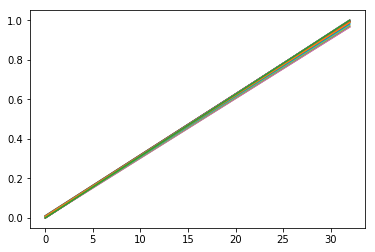

In [72]:
cur_mark
#np.linspace(0, 1, num=interp+2)
#a, b = np.histogram(total_normed[:,1], bins=total_bin)

import matplotlib.pyplot as plt
plt.plot(cur_mark.T)
#plt.ylabel('some numbers')
plt.show()

In [10]:
a = np.array((1,2,3))
b = np.array([])
np.column_stack((a,b))


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [1]:
# cols = total.shape[1]
# #Normalize First! 
# total_normed = (total- total.min(axis=0))/ (total.max(axis=0)-total.min(axis=0))

Get Joint Histogram between each two dimensions
Area between every other bins in the PC